In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# import oscars csv
df = pd.read_csv('the_oscar_award.csv')

# Explorando o dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10765 entries, 0 to 10764
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      10765 non-null  int64 
 1   year_ceremony  10765 non-null  int64 
 2   ceremony       10765 non-null  int64 
 3   category       10765 non-null  object
 4   name           10761 non-null  object
 5   film           10450 non-null  object
 6   winner         10765 non-null  bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 515.3+ KB


In [4]:
df.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


In [5]:
df.isna().sum()

year_film          0
year_ceremony      0
ceremony           0
category           0
name               4
film             315
winner             0
dtype: int64

# Perguntas

## Pergunta 1

Existe alguma relação entre quantidade de vezes indicado e quantidade de vitorias?

In [96]:
#somar quantas vezes um filme ganhou 
df['film_win'] = df[df['winner'] == True].groupby(['film','year_film'])['film'].transform('count')

In [98]:
# somar quantas vezes um filme foi indicado
df['film_nomination'] = df.groupby(['film','year_film'])['film'].transform('count')

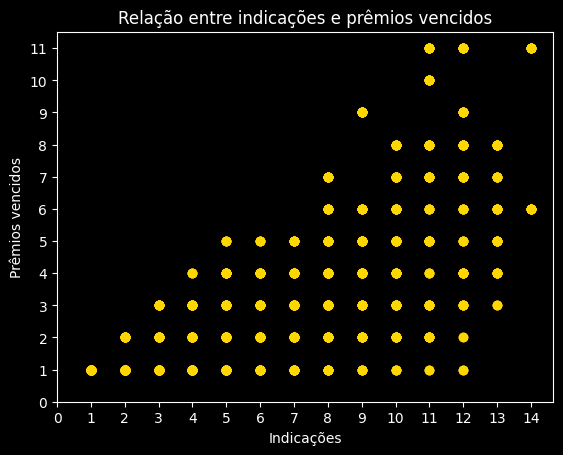

In [108]:
# relacionar quantas vezes o filme foi indicado com quantas vezes ele ganhou em um scatter plot
plt.style.use('dark_background')
plt.scatter(df['film_nomination'], df['film_win'], color='gold')
plt.title('Relação entre indicações e prêmios vencidos')
plt.xticks(np.arange(0, df['film_nomination'].max()+1, 1))
plt.xlabel('Indicações')
plt.yticks(np.arange(0, df['film_win'].max()+1, 1))
plt.ylabel('Prêmios vencidos')
plt.show()

## Pergunta 2

Quais filmes que foram indicados a mais de duas vezes e que ganharam todas as categorias que concorriam?

In [10]:
# pegar os filmes que ganharam mais de 2 prêmios e que foram indicados mais de 2 vezes
winners = df[(df['film_nomination'] > 2) & (df['film_win'] == df['film_nomination'])][['film', 'year_ceremony', 'film_win', 'film_nomination']].drop_duplicates(subset='film').sort_values(by='film_win', ascending=False)
winners

,film,year_ceremony,film_win,film_nomination
8366,The Lord of the Rings: The Return of the King,2004,11.0,11.0
3385,Gigi,1959,9.0,9.0
6598,The Last Emperor,1988,9.0,9.0
266,It Happened One Night,1935,5.0,5.0
5224,The Great Gatsby,1975,4.0,4.0
7948,The Matrix,2000,4.0,4.0
4393,Grand Prix,1967,3.0,3.0
7305,Jurassic Park,1994,3.0,3.0
8843,The Bourne Ultimatum,2008,3.0,3.0
10521,CODA,2022,3.0,3.0


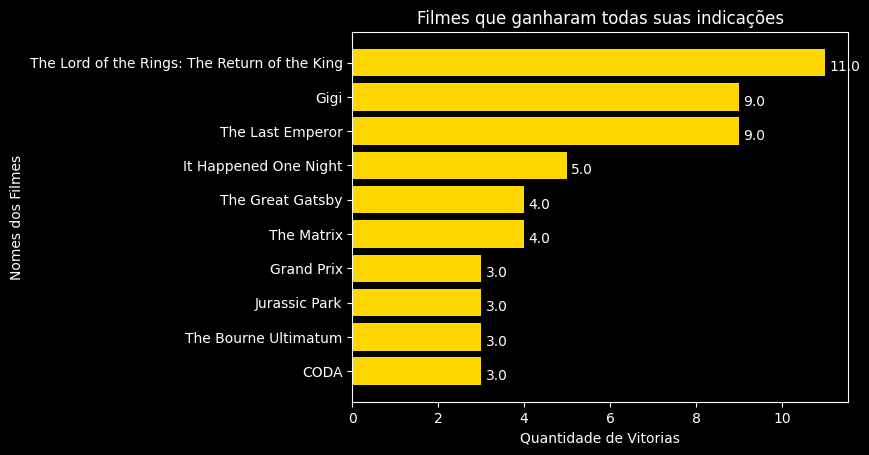

In [11]:
# graficar os filmes que ganharam todas suas indicações
plt.style.use('dark_background')
plt.barh(winners['film'], winners['film_win'], color='gold')
plt.ylabel("Nomes dos Filmes")
plt.xlabel("Quantidade de Vitorias")

# coloca o numero exato de vitorias ao lado da barra
for i, v in enumerate(winners['film_win']):
    plt.text(v + 0.1, i + .25, str(v))

plt.title("Filmes que ganharam todas suas indicações") 
plt.gca().invert_yaxis()
plt.show() 

## Pergunta 3

Número de categorias ao longo dos anos 

In [12]:
#Número de categorias por cerimônia
categories_year = df.groupby('year_ceremony')['category'].nunique()

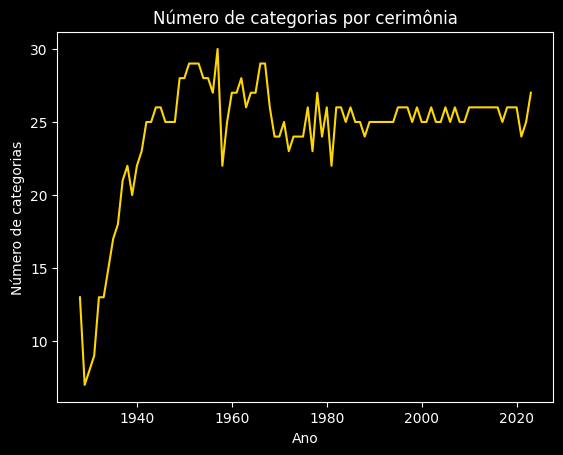

In [13]:
# lineplot matplotlib
plt.style.use('dark_background')
plt.plot(categories_year, color='gold')
plt.title('Número de categorias por cerimônia')
plt.xlabel('Ano')
plt.ylabel('Número de categorias')
plt.show()


## Pergunta 4

Homens que foram indicados em categorias de atuação e em direção. Quantas indicações teve em cada categoria?

In [14]:
# pegar todos os nomes da categoria ACTOR, ACTOR IN A LEADING ROLE e ACTOR IN A SUPPORTING ROLE
actors = df[(df['category'] == 'ACTOR') | (df['category'] == 'ACTOR IN A LEADING ROLE') | (df['category'] == 'ACTOR IN A SUPPORTING ROLE')]['name'].unique()
# pegar todos os names da categoria DIRECTING
directors = df[(df['category'] == 'DIRECTING')]['name'].unique()

In [15]:
# diretores que também foram atores
directors_actors = [director for director in directors if director in actors]
directors_actors

['Lionel Barrymore',
 'Orson Welles',
 'Laurence Olivier',
 'John Huston',
 'John Cassavetes',
 'Woody Allen',
 'Robert Redford',
 'Warren Beatty',
 'Kenneth Branagh',
 'Kevin Costner',
 'Clint Eastwood',
 'Tim Robbins',
 'Roberto Benigni',
 'George Clooney',
 'Steve McQueen']

In [52]:
# Quantidade de vezes que um director_actor foi indicado na categoria directing
win_directing = df[(df['category'] == 'DIRECTING') & (df['name'].isin(directors_actors))].groupby('name')['name'].count()
win_directing

name
Clint Eastwood      4
George Clooney      1
John Cassavetes     1
John Huston         5
Kenneth Branagh     2
Kevin Costner       1
Laurence Olivier    1
Lionel Barrymore    1
Orson Welles        1
Robert Redford      2
Roberto Benigni     1
Steve McQueen       1
Tim Robbins         1
Warren Beatty       1
Woody Allen         7
Name: name, dtype: int64

In [17]:
# Quantidade de vezes que um um director_actor foi indicado nas categorias de ator
win_actor = df[((df['category'] == 'ACTOR') | (df['category'] == 'ACTOR IN A LEADING ROLE') | (df['category'] == 'ACTOR IN A SUPPORTING ROLE')) & (df['name'].isin(directors_actors))].groupby('name')['name'].count()

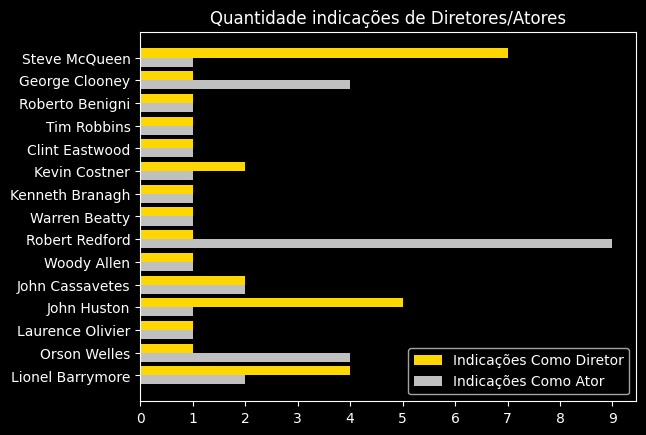

In [54]:
#graficar por barras agrupadas
plt.style.use('dark_background')
x = np.arange(len(directors_actors))

plt.title('Quantidade indicações de Diretores/Atores')

#colocar os nomes no eixo x
plt.yticks(x, directors_actors)
plt.xticks(np.arange(0, win_actor.max()+1, 1))

plt.barh(x+0.2, win_directing, 0.40, color='gold') 
plt.barh(x-0.2, win_actor, 0.40, color='silver')

plt.legend(["Indicações Como Diretor","Indicações Como Ator"]) 

plt.show()

## Pergunta 5

Crie uma métrica para avaliar a performace do filme na cerimonia. Diga quanto tiveram uma performace Boa, regular e ruim. 
- Regras:
    - boa: ganhou mais de 50% das indicações
    - regular: ganhou entre 25% e 50% das indicações
    - ruim: ganhou menos de 25% das indicações
- Remova os filmes que foram indicados a menos de 3 categorias

In [36]:
#classificar os filmes em series
good = df[(df['film_nomination'] > 3) & (df['film_win'] >= df['film_nomination']/2)][['film']].drop_duplicates(subset='film')
regular = df[(df['film_nomination'] > 3) & (df['film_win'] >= df['film_nomination']/4) & ((df['film_win'] < df['film_nomination']/2))][['film']].drop_duplicates()
bad = df[(df['film_nomination'] > 3) & (df['film_win'] < df['film_nomination']/4)][['film']].drop_duplicates()
print(len(good), len(regular), len(bad))

128 252 184


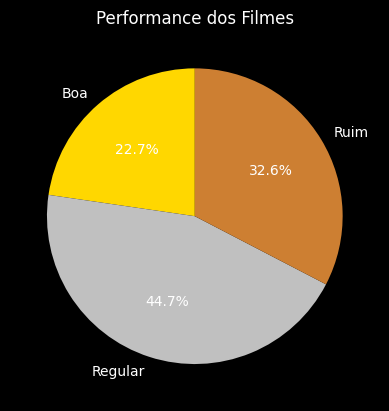

In [49]:
#tornar good, regular e bad em um grafico de pizza
plt.style.use('dark_background')
plt.pie([len(good), len(regular), len(bad)], labels=['Boa', 'Regular', 'Ruim'], colors=['gold', 'silver', '#CD7F32'], autopct='%1.1f%%', startangle=90)
plt.title('Performance dos Filmes')
plt.show()
